In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/UK Road Accidents2.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [8]:
#Importing the dataset

df = pd.read_csv('/content/UK Road Accidents2.csv')
#df = pd.read_csv('/content/UK Road Accidents_used.csv')

In [9]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [10]:
# Import the data
df = pd.read_csv('/content/UK Road Accidents2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290843 entries, 0 to 290842
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              290843 non-null  object 
 1   Accident Date               290843 non-null  object 
 2   Day_of_Week                 290843 non-null  object 
 3   Junction_Control            290843 non-null  object 
 4   Junction_Detail             290843 non-null  object 
 5   Accident_Severity           290843 non-null  object 
 6   Latitude                    290843 non-null  float64
 7   Light_Conditions            290843 non-null  object 
 8   Local_Authority_(District)  290843 non-null  object 
 9   Carriageway_Hazards         5042 non-null    object 
 10  Longitude                   290843 non-null  float64
 11  Number_of_Casualties        290843 non-null  int64  
 12  Number_of_Vehicles          290843 non-null  int64  
 13  Police_Force  

In [11]:
# Find the number of missing values present in each column
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           285801
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions            0
Road_Type                          0
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions                 0
Vehicle_Type                       0
dtype: int64

Accident_Severity
Slight     248635
Serious     38497
Fatal        3711
Name: count, dtype: int64


<Axes: xlabel='Accident_Severity'>

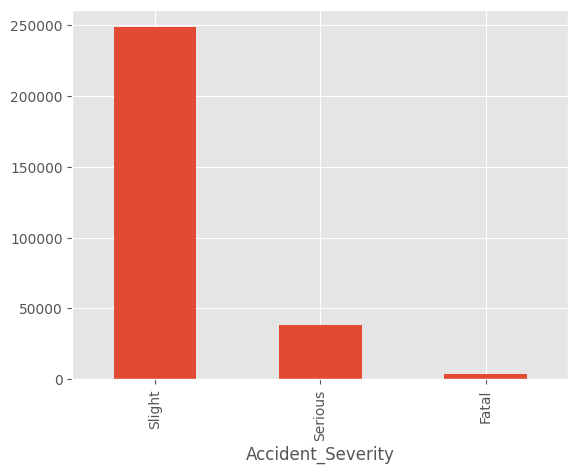

In [12]:
# target variable classes counts and bar plot
print(df['Accident_Severity'].value_counts())
df['Accident_Severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Road_Surface_Conditions'>

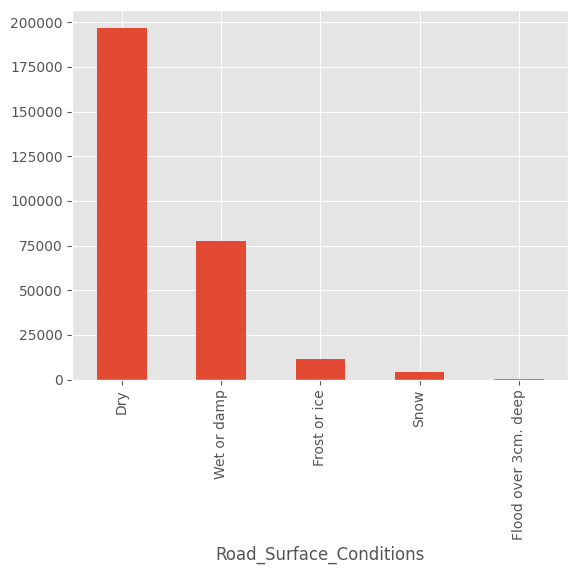

In [13]:
# Education levels of car drivers
df['Road_Surface_Conditions'].value_counts().plot(kind='bar')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.0/567.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 38.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling 

Target looks like classification
Linear Discriminant Analysis training set score: 0.336


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_Severity'>,
 [array([[<Axes: ylabel='Latitude'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='Longitude'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='Number_of_Casualties'>, <Axes: >, <Axes: >,
          <Axes: >],
         [<Axes: xlabel='Latitude', ylabel='Number_of_Vehicles'>,
          <Axes: xlabel='Longitude'>,
          <Axes: xlabel='Number_of_Casualties'>,
          <Axes: xlabel='Number_of_Vehicles'>]], dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 400x400 with 1 Axes>],
 array([[<Axes: title={'center': 'Local_Authority_(District)'}>,
         <Axes: title={'center': 'Speed_limit'}>,
         <Axes: title={'center': 'Police_Force'}>,
         <Axes: title={'center': 'Junction_Detail'}>,
         <Axes: title={'center': 'Urban_or_Rural_Area'}>],
        [<Axes: title={'center': 'Junction_Control'}>,
         <Axes: title={'center': 'Light_Conditions'}

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


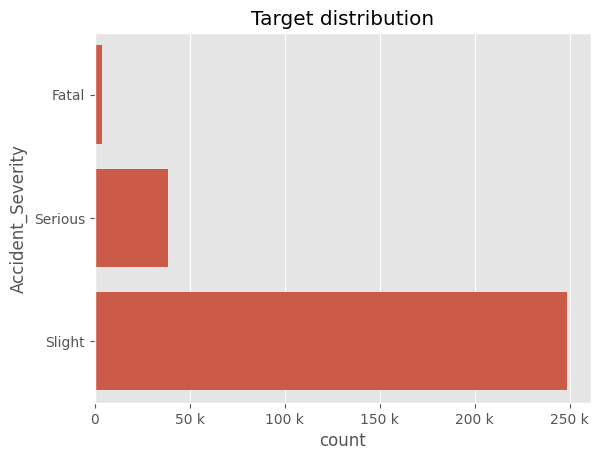

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


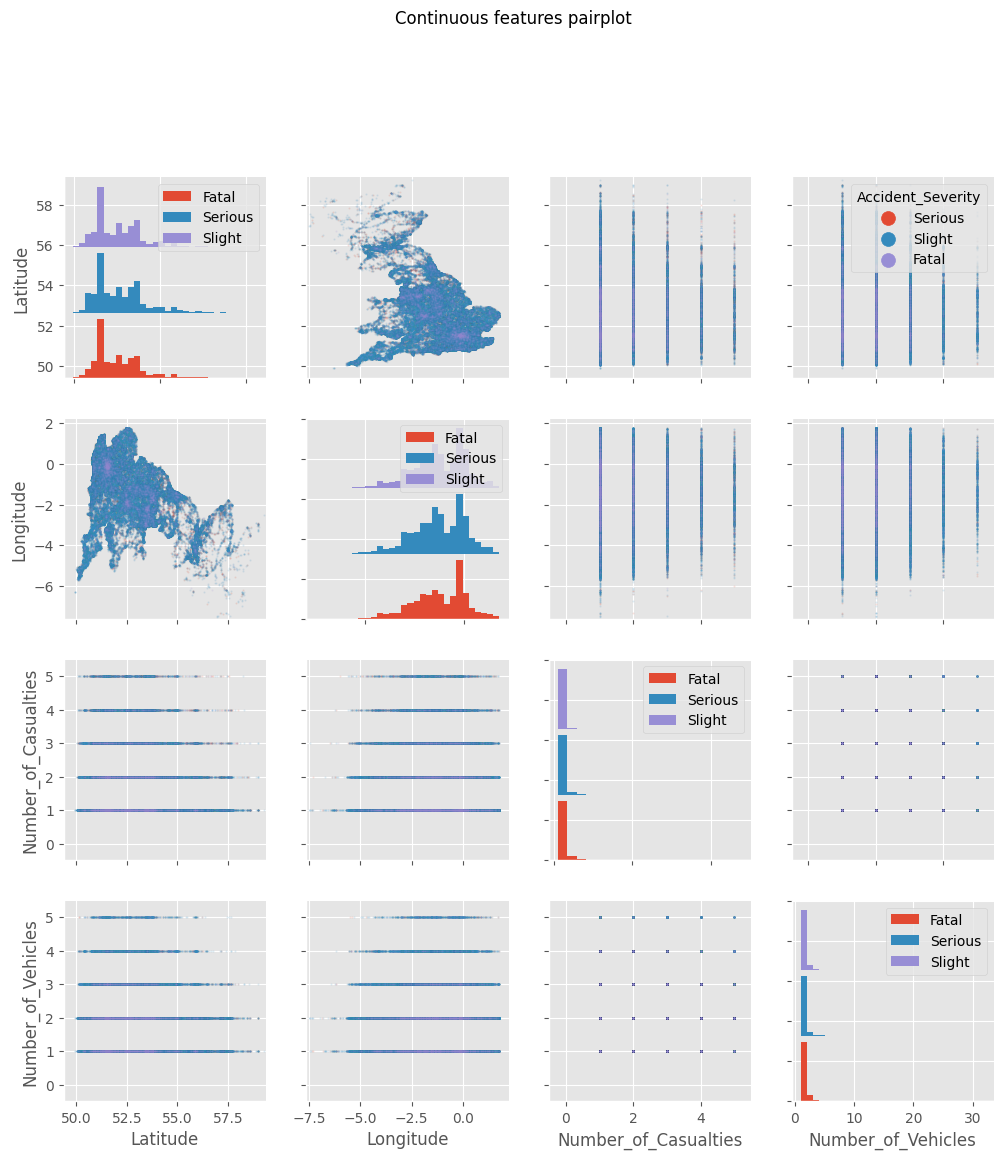

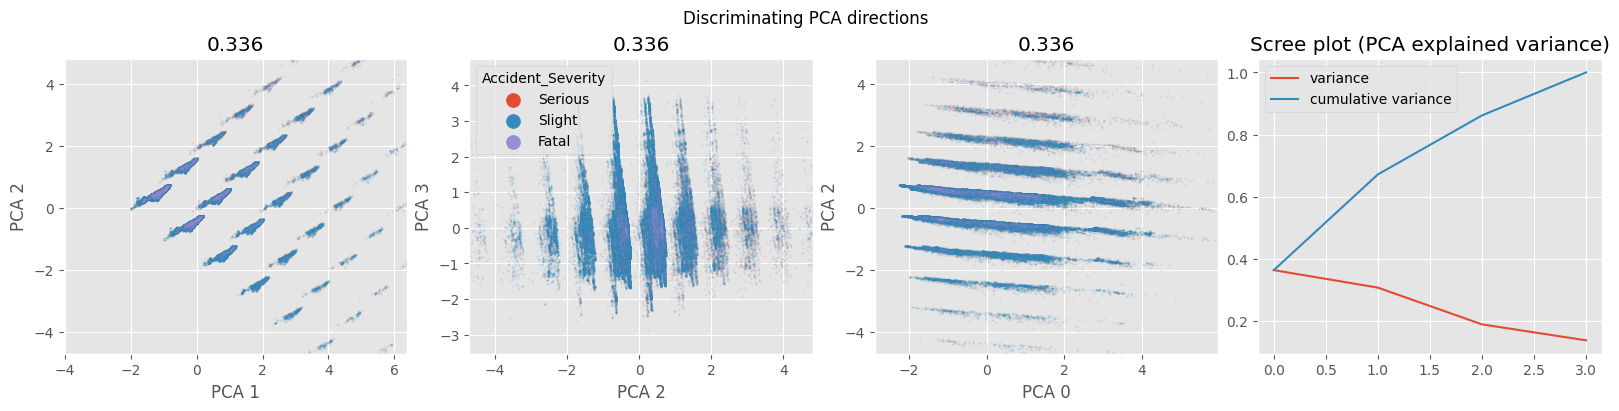

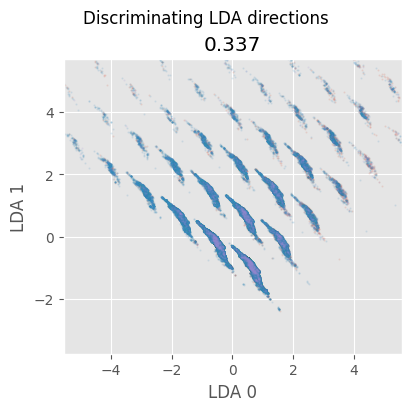

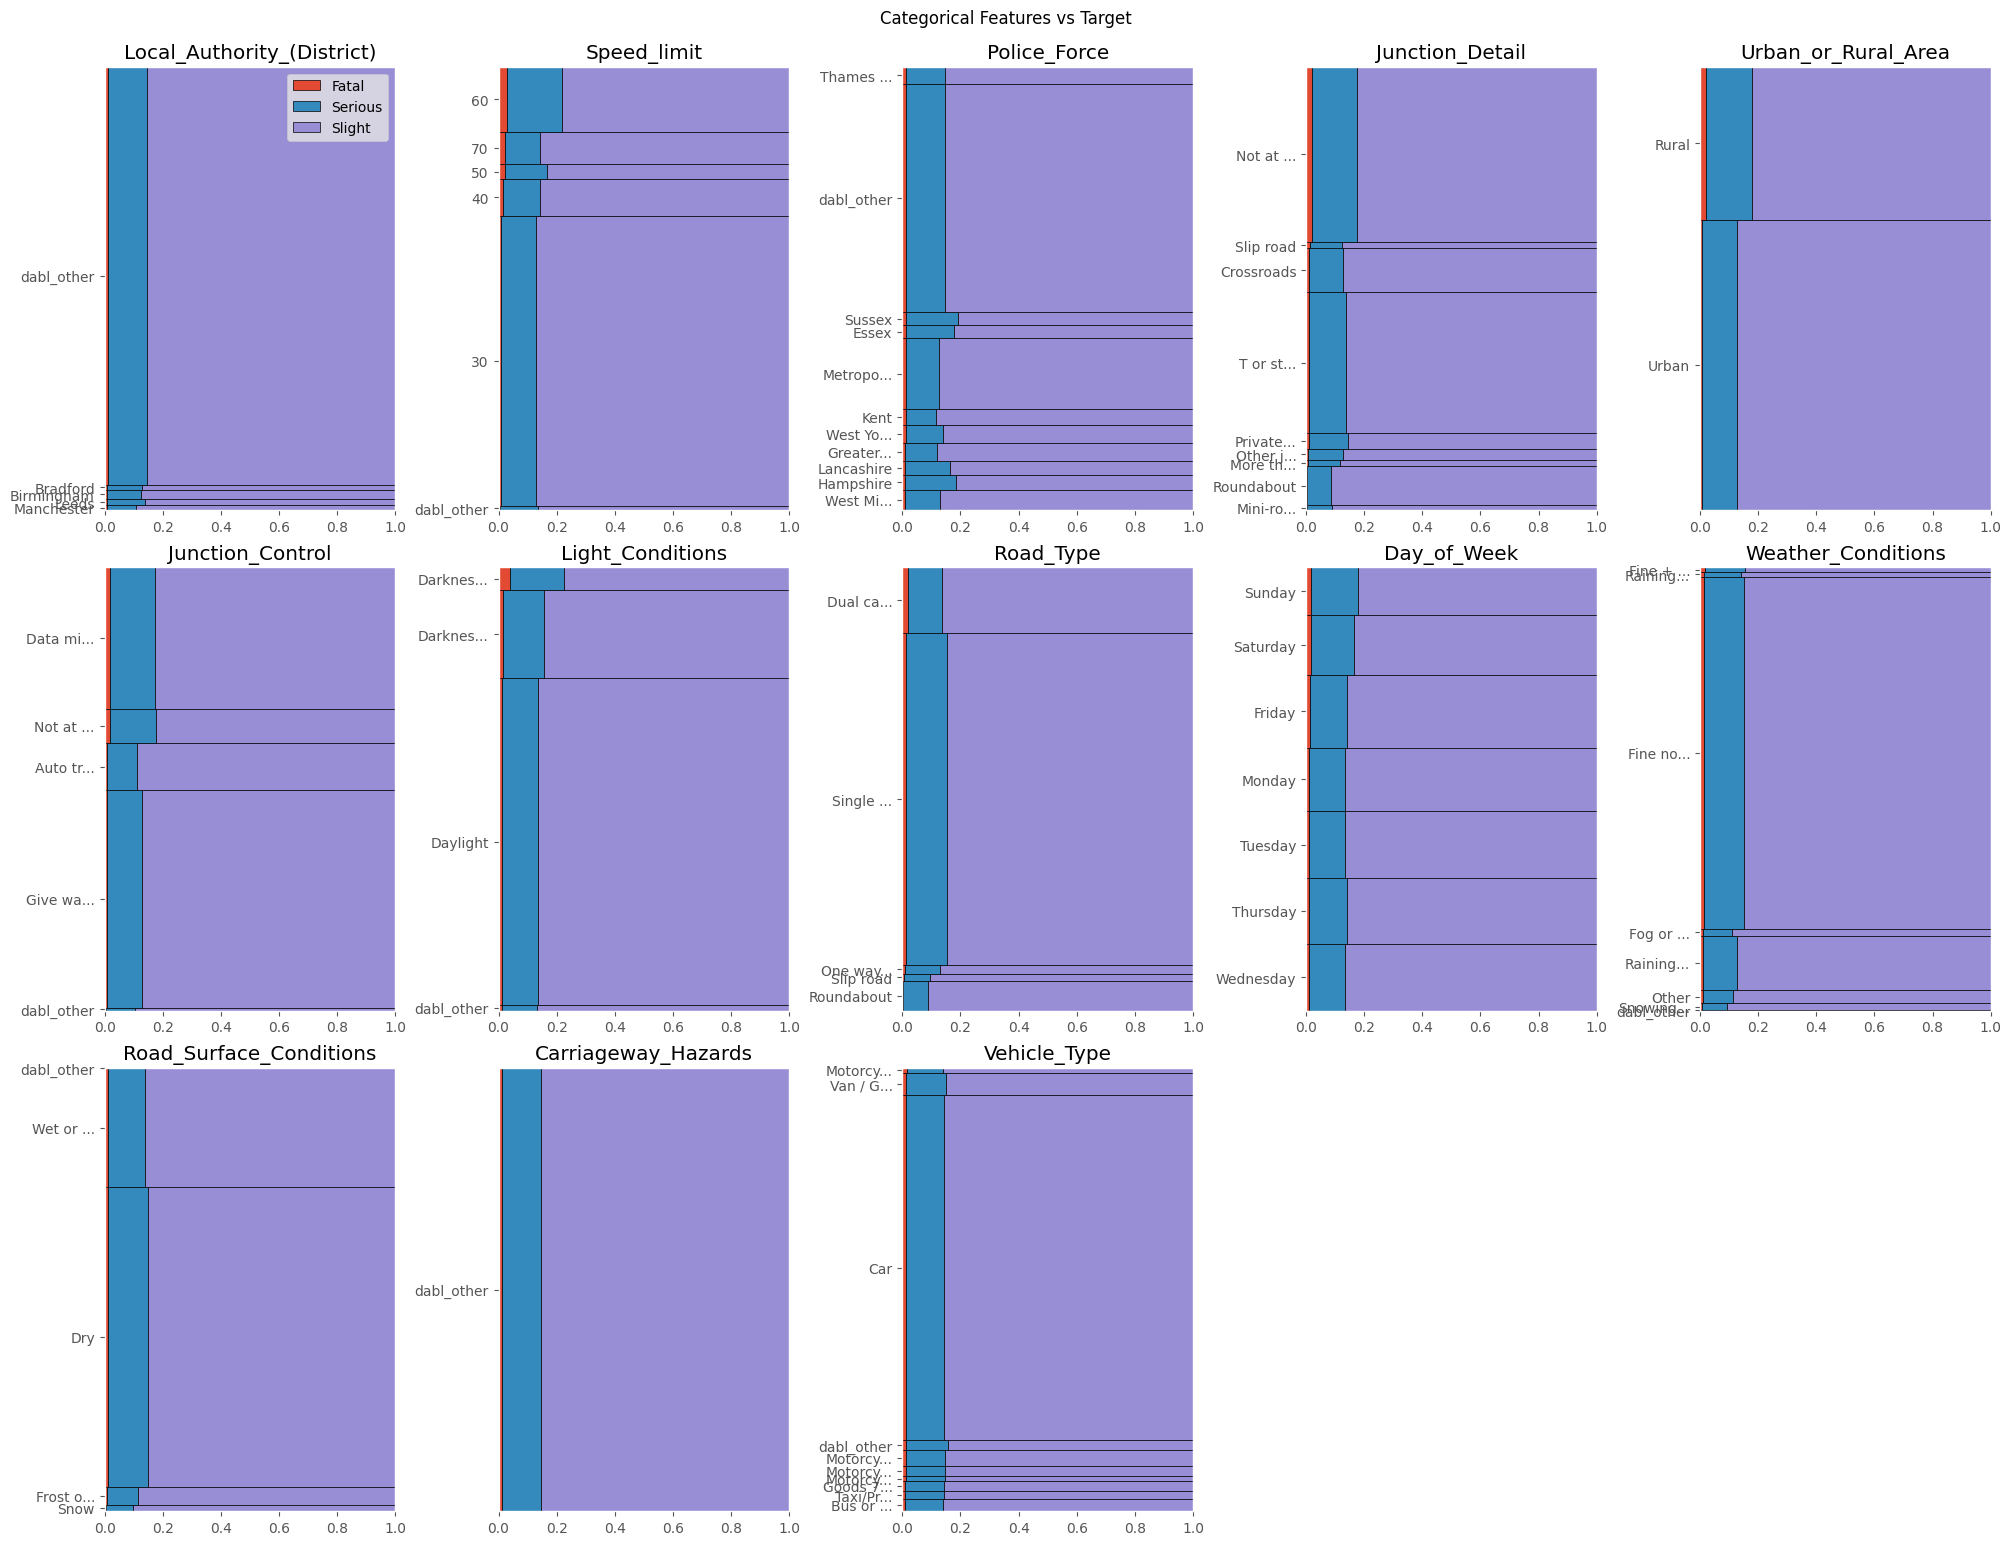

In [14]:
!pip install dabl
import dabl
# Visualizing dataset using dabl library
dabl.plot(df, target_col='Accident_Severity')

/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling 

Target looks like classification
Linear Discriminant Analysis training set score: 0.253


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Speed_limit'>,
 [array([[<Axes: ylabel='Latitude'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='Longitude'>, <Axes: >, <Axes: >, <Axes: >],
         [<Axes: ylabel='Number_of_Casualties'>, <Axes: >, <Axes: >,
          <Axes: >],
         [<Axes: xlabel='Latitude', ylabel='Number_of_Vehicles'>,
          <Axes: xlabel='Longitude'>,
          <Axes: xlabel='Number_of_Casualties'>,
          <Axes: xlabel='Number_of_Vehicles'>]], dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1600x400 with 4 Axes>],
 array([[<Axes: title={'center': 'Urban_or_Rural_Area'}, xlabel='count', ylabel='Urban_or_Rural_Area'>,
         <Axes: title={'center': 'Local_Authority_(District)'}, xlabel='count', ylabel='Local_Authority_(...'>,
         <Axes: title={'center': 'Road_Type'}, xlabel='count', ylabel='Road_Type'>,
         <Axes: title={'center': 'Police_Force'}, xlabel='count', ylabel='Police_Force'>,
 

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


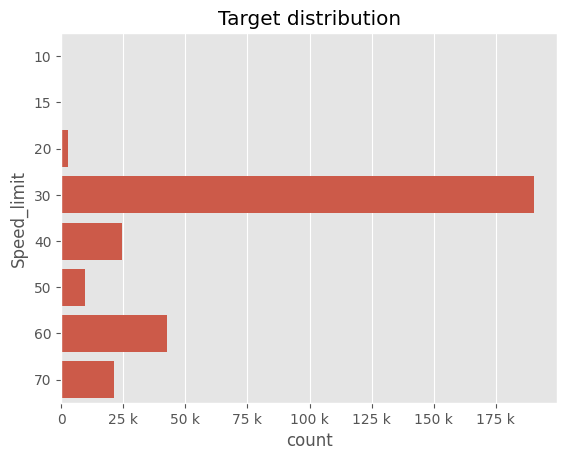

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


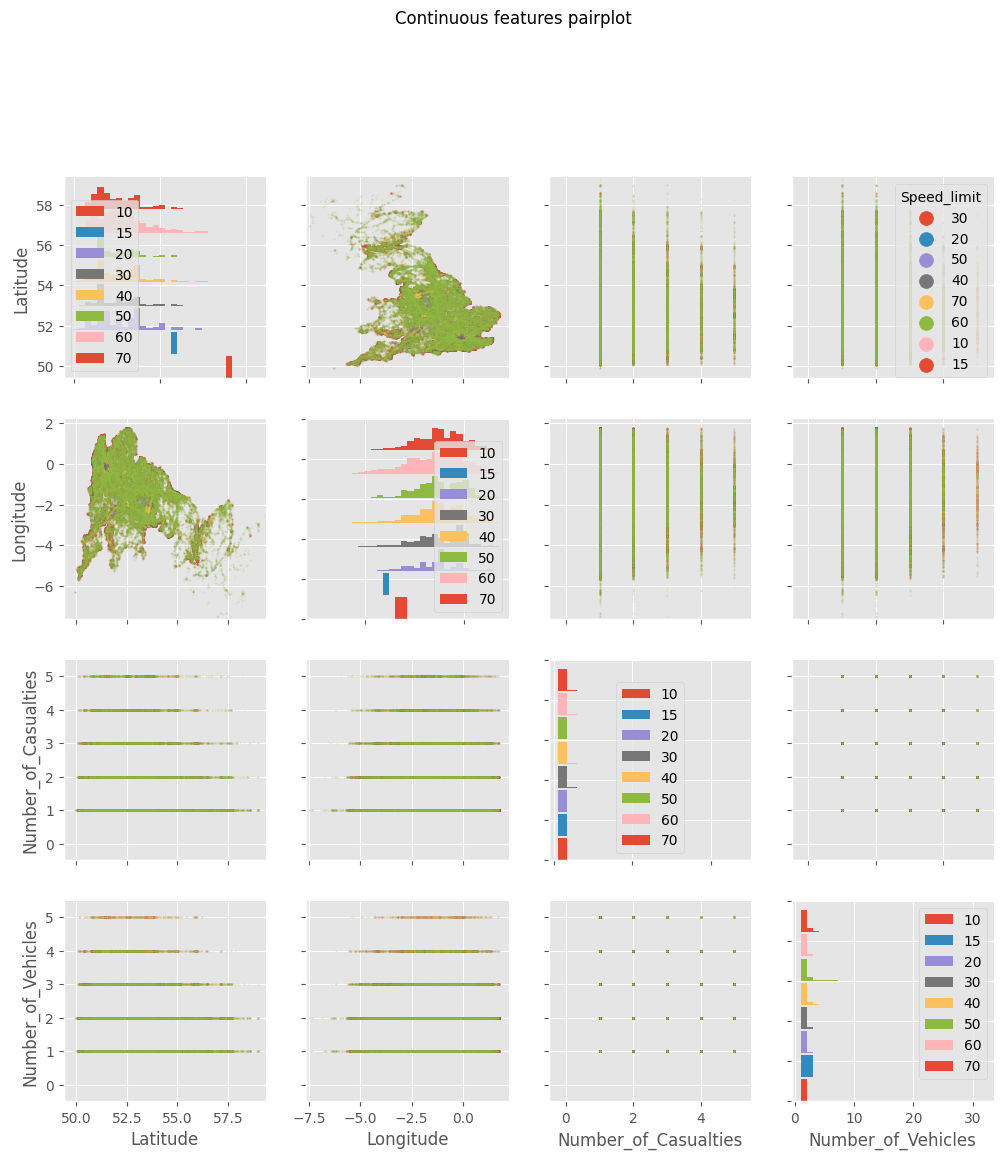

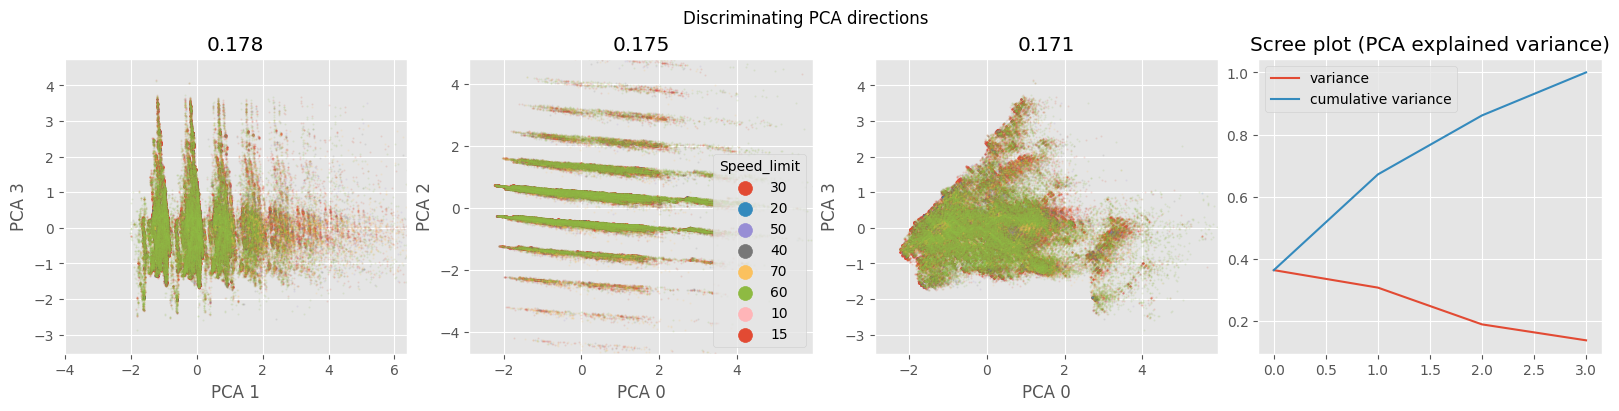

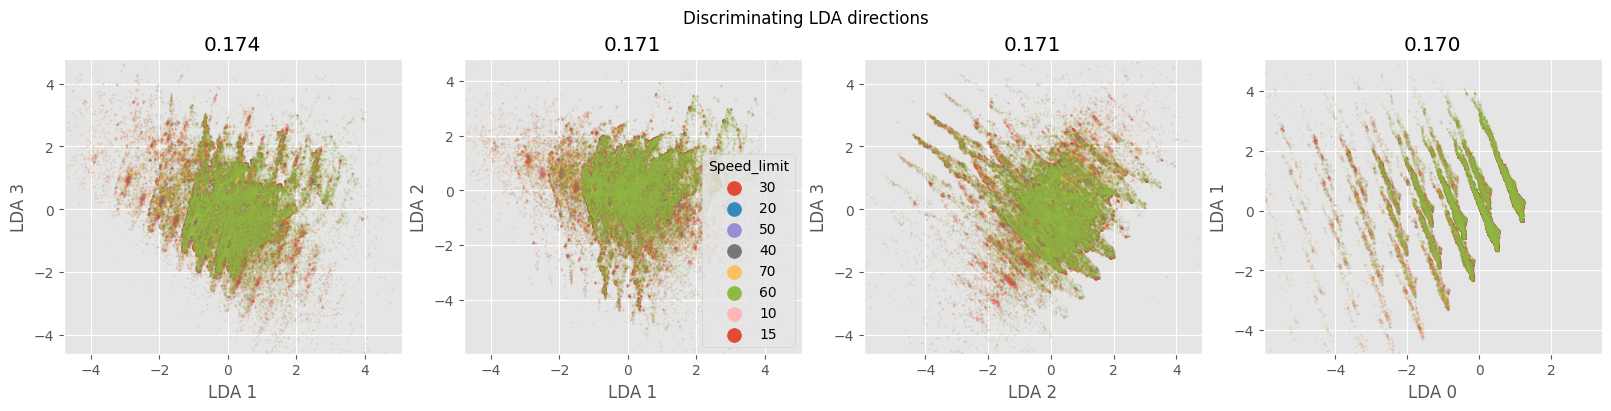

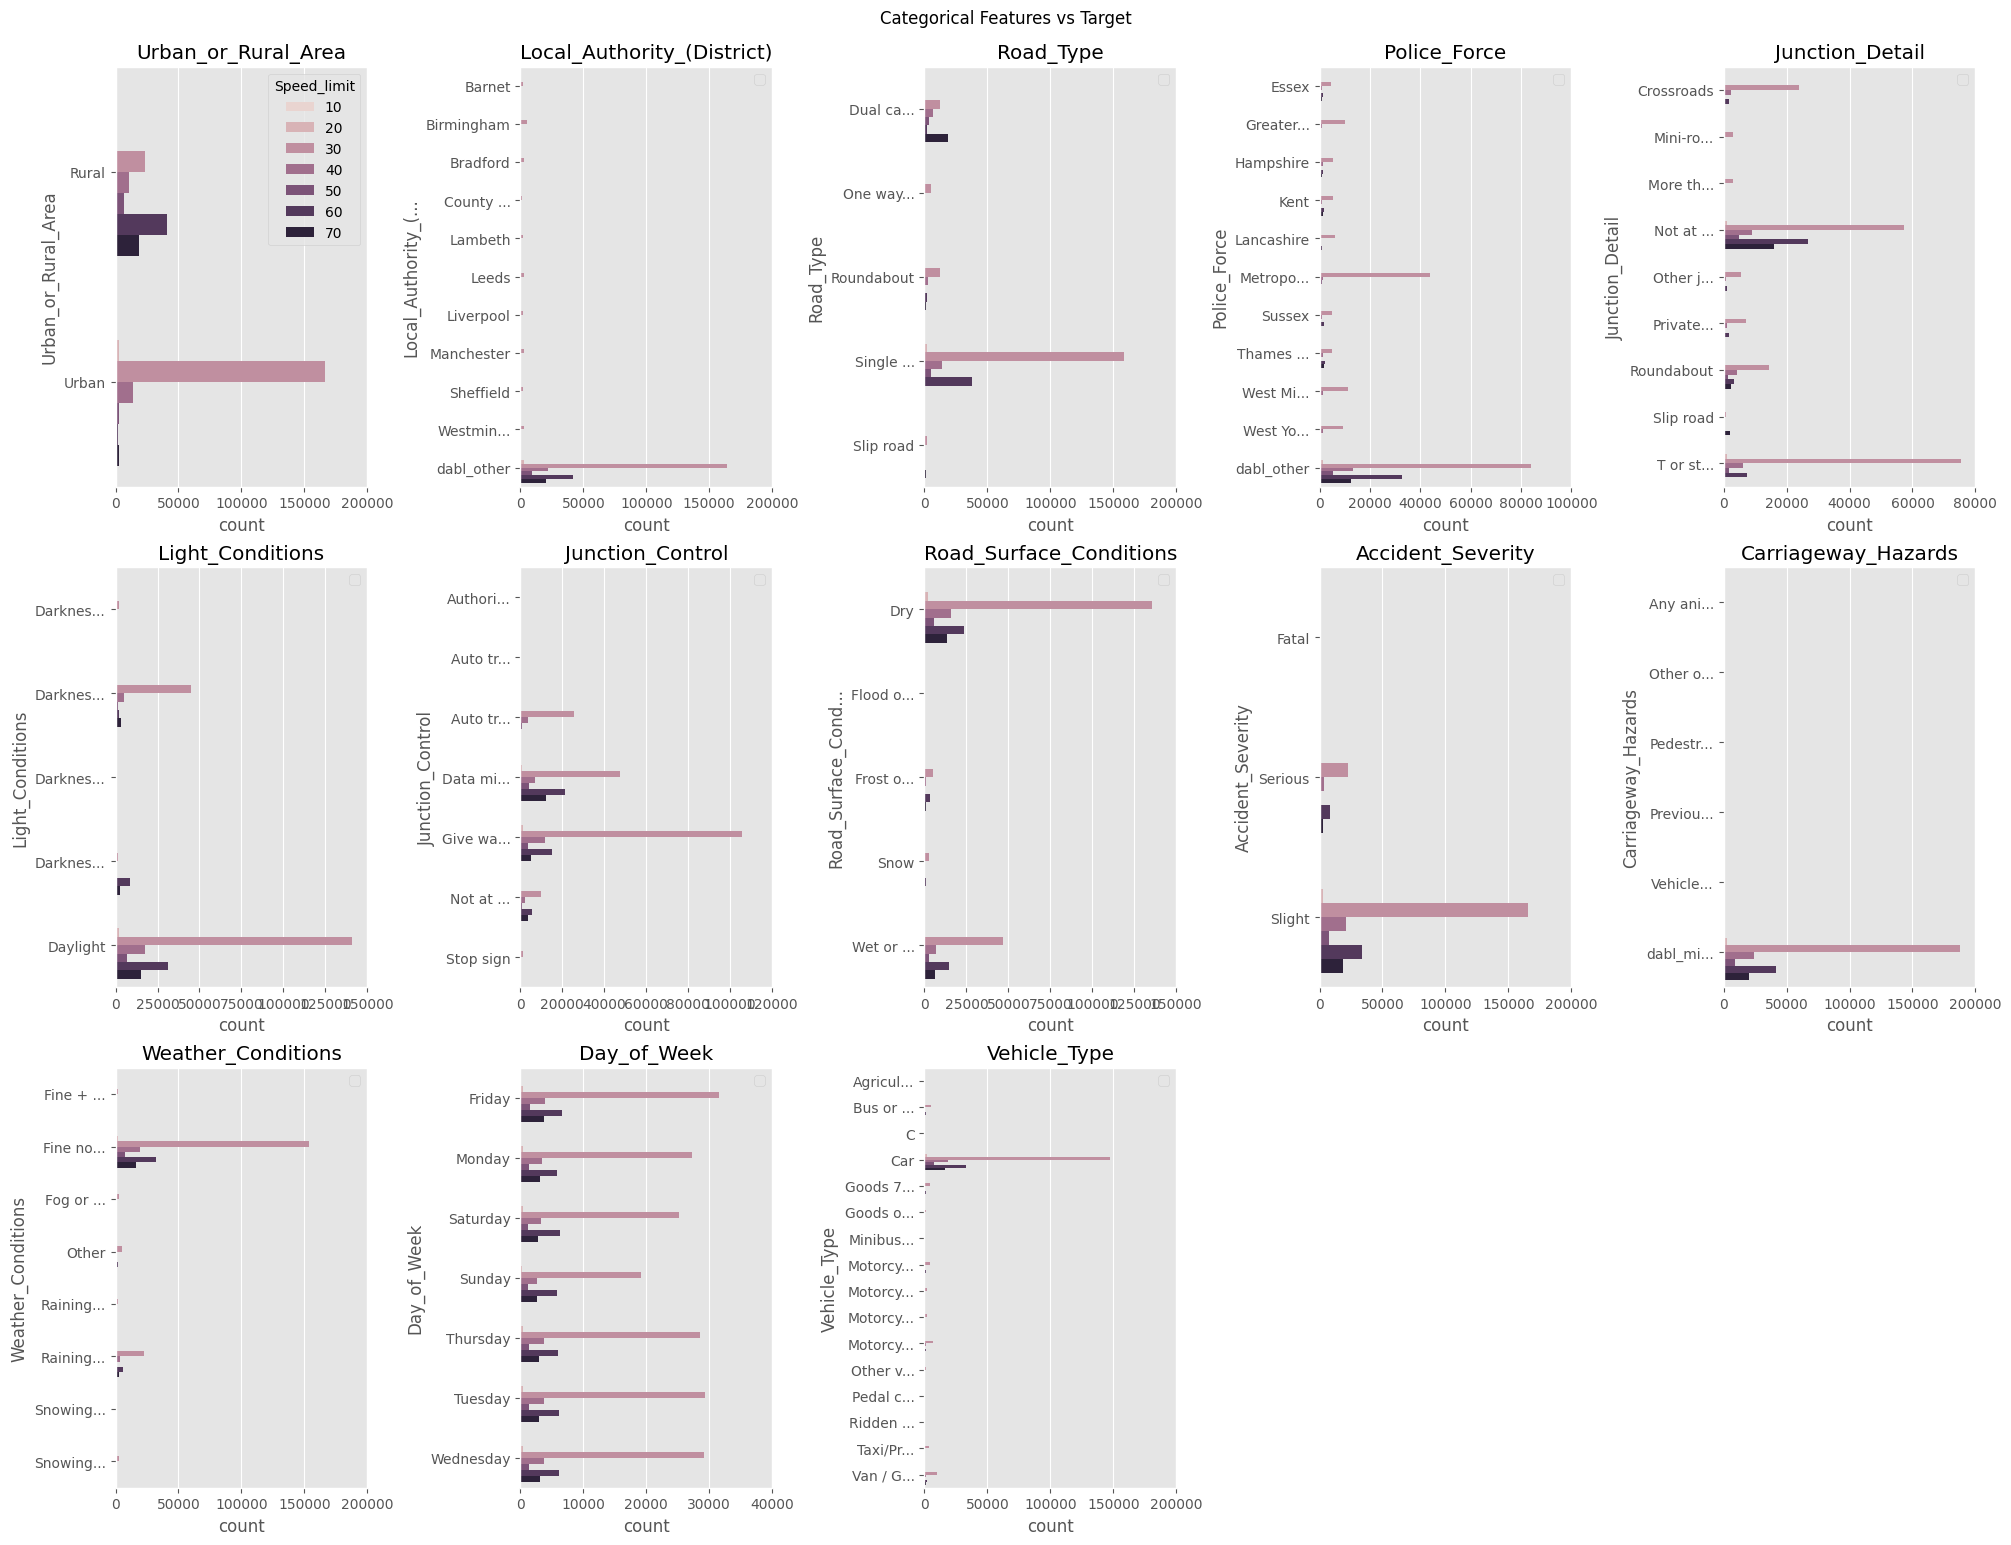

In [15]:
!pip install dabl
import dabl
# Visualizing dataset using dabl library
dabl.plot(df, target_col='Speed_limit')

<function matplotlib.pyplot.show(close=None, block=None)>

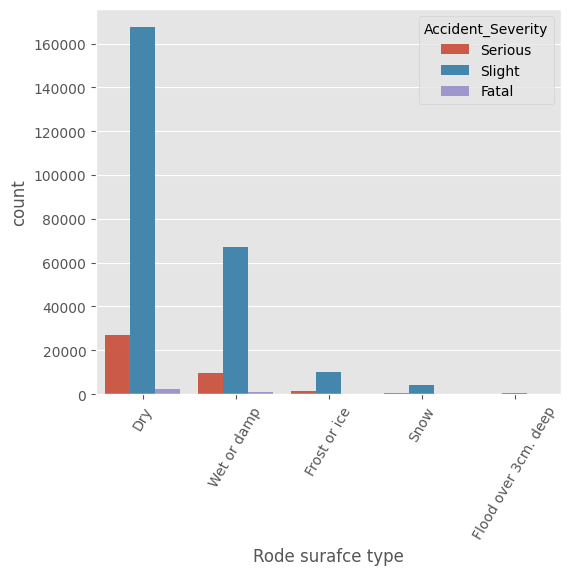

In [16]:
# plot the bar plot of road_surface_type and accident severity feature
plt.figure(figsize=(6,5))
sns.countplot(x='Road_Surface_Conditions', hue='Accident_Severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

In [17]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()

<ipython-input-17-37bcb8e237f9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Hour_of_Day
0,BS0000001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,Urban,Fine no high winds,Car,15.0
1,BS0000002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,Urban,Fine no high winds,Taxi/Private hire car,10.0
2,BS0000003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Taxi/Private hire car,14.0
3,BS0000004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,Urban,Other,Motorcycle over 500cc,8.0
4,BS0000005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,Urban,Fine no high winds,Car,17.0


In [18]:
# feature selection based on visualization (to_be_continue)
features = ['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
            'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
            'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type',
            'Speed_limit', 'Hour_of_Day', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']

# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_Severity']

# create a ciopy dataframe featureset_df to handle the missing values
feature_df = featureset_df.copy()

In [19]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Hour_of_Day'] = feature_df['Hour_of_Day'].fillna('Unknown')
feature_df['Carriageway_Hazards'] = feature_df['Carriageway_Hazards'].fillna('Unknown')


# features information
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290843 entries, 0 to 290842
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              290843 non-null  object 
 1   Accident Date               290843 non-null  object 
 2   Day_of_Week                 290843 non-null  object 
 3   Junction_Control            290843 non-null  object 
 4   Junction_Detail             290843 non-null  object 
 5   Accident_Severity           290843 non-null  object 
 6   Latitude                    290843 non-null  float64
 7   Light_Conditions            290843 non-null  object 
 8   Local_Authority_(District)  290843 non-null  object 
 9   Carriageway_Hazards         290843 non-null  object 
 10  Longitude                   290843 non-null  float64
 11  Number_of_Casualties        290843 non-null  int64  
 12  Number_of_Vehicles          290843 non-null  int64  
 13  Police_Force  

In [20]:
# Categorical features to encode using one hot encoding
features = ['Day_of_Week', 'Junction_Control', 'Junction_Detail',
            'Accident_Severity', 'Latitude', 'Light_Conditions', 'Carriageway_Hazards',
             'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
            'Speed_limit', 'Hour_of_Day', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']

# setting input features X and target y
X = feature_df[features]  # here features are selected from 'object' datatype
y = n_df['Accident_Severity']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape



(290843, 90)

In [21]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)


Encoded labels: ['Fatal' 'Serious' 'Slight']


In [22]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

In [23]:
# importing the SMOTENC object from imblearn library
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((745905, 50), (745905,))

In [24]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [27]:
# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)



# Convert DataFrames to NumPy arrays
X_train = X_trn.to_numpy()
X_test = X_tst.to_numpy()


In [28]:


# Reshape the data for CNN
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [29]:
from keras.utils import to_categorical

# Convert target variable to categorical
y_train = to_categorical(y_trn)
y_test = to_categorical(y_tst)


In [30]:
from tensorflow import keras

import keras_tuner as kt
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
                     activation='relu',
                     input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=16),
                     kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
                     activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  metrics=['accuracy'])
    return model

In [32]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     factor=3,
                     directory='keras_tuner_dir',
                     project_name='Accident_Severity')

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=3, restore_best_weights=True
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



Trial 10 Complete [00h 13m 01s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 02h 30m 57s


In [33]:
# # Train model
# history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
18648/18648 [==============================] - 428s 23ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 1.4424e-07 - val_accuracy: 1.0000
Epoch 2/20
18648/18648 [==============================] - 423s 23ms/step - loss: 9.2360e-07 - accuracy: 1.0000 - val_loss: 2.1749e-09 - val_accuracy: 1.0000
Epoch 3/20
18648/18648 [==============================] - 449s 24ms/step - loss: 5.9634e-08 - accuracy: 1.0000 - val_loss: 2.1404e-09 - val_accuracy: 1.0000
Epoch 4/20
18648/18648 [==============================] - 441s 24ms/step - loss: 1.5496e-09 - accuracy: 1.0000 - val_loss: 2.0893e-09 - val_accuracy: 1.0000


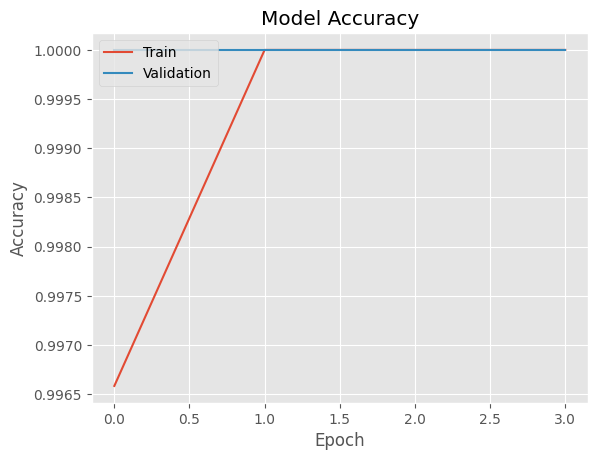

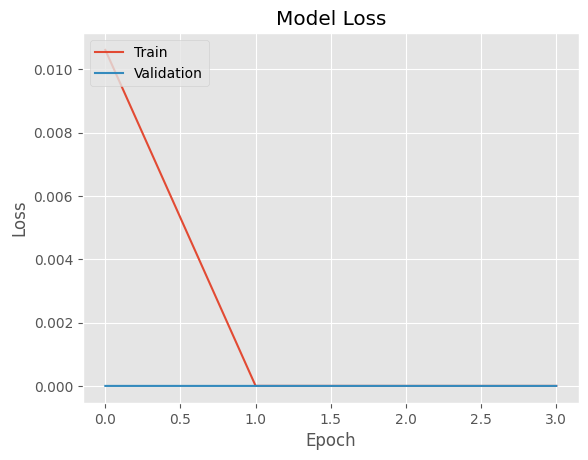

In [34]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Manually set tick labels
class_names = ['minor', 'severe', 'deadly']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

plt.show()


In [36]:
# Classification Report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49715
           1       1.00      1.00      1.00     49831
           2       1.00      1.00      1.00     49635

    accuracy                           1.00    149181
   macro avg       1.00      1.00      1.00    149181
weighted avg       1.00      1.00      1.00    149181



In [37]:
# import the necessary liabrary
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score
rf.score(X_trn, y_trn)

1.0

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_tst, predics)
f1 = f1_score(y_tst, predics, average='weighted')
conf_matrix = confusion_matrix(y_tst, predics)

#print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[49715     0     0]
 [    0 49831     0]
 [    0     0 49635]]


In [39]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49715
           1       1.00      1.00      1.00     49831
           2       1.00      1.00      1.00     49635

    accuracy                           1.00    149181
   macro avg       1.00      1.00      1.00    149181
weighted avg       1.00      1.00      1.00    149181



In [ ]:
# Confusion Matrix
predics = rf.predict(X_tst)
#predics_classes = np.argmax(predics, axis=1)
#y_true = np.argmax(y_tst, axis=1)
#conf_matrix = confusion_matrix(y_true, predics_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of random forest classifier')

# Manually set tick labels
class_names = ['Fatal', 'Serious', 'Slight']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

plt.show()

In [41]:
# import the necessary liabrary
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score



# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
knn =  KNeighborsClassifier(n_neighbors=6)
knn.fit(X_trn, y_trn)

# predicting on test data
predics_knn = knn.predict(X_tst)

# train score
knn.score(X_trn, y_trn)

0.9981498984455125

In [42]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_trn, y_trn)

# Predict the labels for the training data X
knn_pred = knn.predict(X_tst)

# Get the accuracy score
acc=accuracy_score(y_tst, knn_pred)

#acc.fit(X_trn, y_trn)

# predicting on test data
predics_knn = knn.predict(X_tst)

# train score
knn.score(X_trn, y_trn)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_tst, y_tst)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.997.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.997.


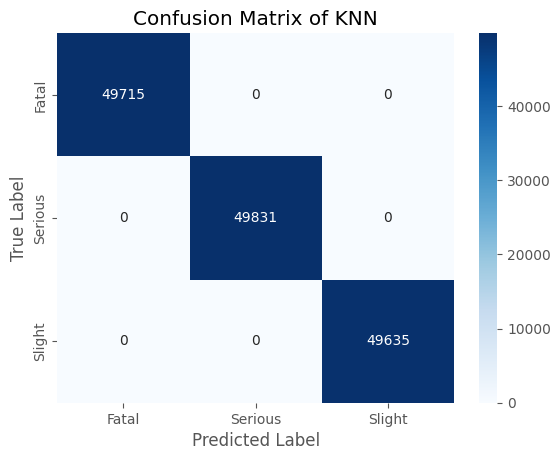

In [43]:
# Confusion Matrix

predics_knn = knn.predict(X_tst)
#predics_classes = np.argmax(predics, axis=1)
#y_true = np.argmax(y_tst, axis=1)
#conf_matrix = confusion_matrix(y_true, predics_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')

# Manually set tick labels
class_names = ['Fatal', 'Serious', 'Slight']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

plt.show()

In [44]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics_knn)
print(classif_re)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     49715
           1       1.00      1.00      1.00     49831
           2       1.00      0.99      1.00     49635

    accuracy                           1.00    149181
   macro avg       1.00      1.00      1.00    149181
weighted avg       1.00      1.00      1.00    149181



In [45]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_trn, y_trn)

# Use dt_entropy to predict test set labels
dt_entropy_pred= dt_entropy.predict(X_tst)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_tst, dt_entropy_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)




accuracy_lst=[]



# Fit dt_entropy to the training set
dt_gini.fit(X_trn, y_trn)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_tst)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_tst, dt_entropy_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 1.000.
[Decision Tree -- gini] accuracy_score: 1.000.


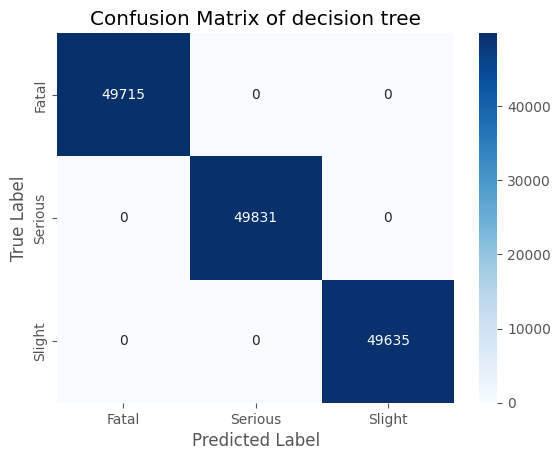

In [46]:
# Confusion Matrix

#y_pred= dt_gini.predict(X_tst)

dt_entropy_pred= dt_entropy.predict(X_tst)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of decision tree')

# Manually set tick labels
class_names = ['Fatal', 'Serious', 'Slight']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

plt.show()

In [47]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trn,y_trn)

y_pred2 = clf.predict(X_tst)


# Get the accuracy score
acc=accuracy_score(y_tst, y_pred2)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 1.000.


In [48]:
# classification report on test dataset
classif_re = classification_report(y_tst,y_pred2)
print(classif_re)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49715
           1       1.00      1.00      1.00     49831
           2       1.00      1.00      1.00     49635

    accuracy                           1.00    149181
   macro avg       1.00      1.00      1.00    149181
weighted avg       1.00      1.00      1.00    149181



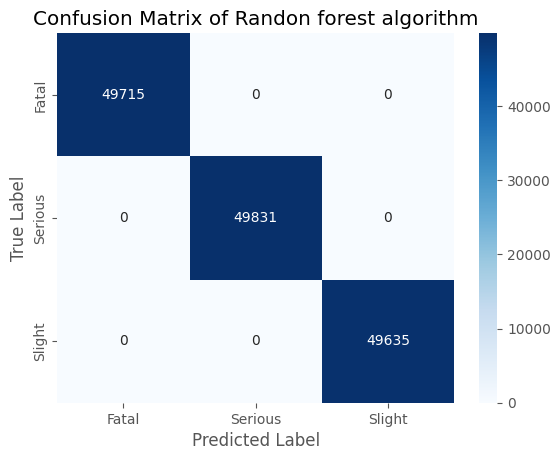

In [49]:
# Confusion Matrix

y_pred2 = clf.predict(X_tst)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Randon forest algorithm')

# Manually set tick labels
class_names = ['Fatal', 'Serious', 'Slight']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

plt.show()